In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from unc_tools import Hyper, UncRegression
from copy import deepcopy
import uncertainties as unc
import os


SAVE_DIR = "/home/yaroslav/vzlet_vault/Практикум/Кинетика фотохимического разложения железа/"
def savefig(name, path= "", fig=None, bbox_inches = None, **kwargs):
    os.makedirs(SAVE_DIR, exist_ok=True)
    if bbox_inches is None:
        bbox_inches = "tight"
    if fig is None:
        fig = plt.gcf()
    new_path = os.path.join(SAVE_DIR, name)
    fig.savefig(new_path, bbox_inches = bbox_inches, **kwargs)
    fig.savefig(os.path.join(".", path, name), bbox_inches = bbox_inches, **kwargs)
    #print(f"Saved: {path}")

def nested_array_to_ufloat(arrays):

    new_array = []
    
    for array in arrays:
        if len(array) == 1:
            new_array.append(array[0])
        else:
            val = unc.ufloat(np.mean(array), np.std(array, ddof = 1))
            new_array.append(val)

    return np.array(new_array)

UncRegression.latex_style(True)

In [2]:
m_fe = 2.02
M_fe = 404.06

m_sha = 1.89
M_sha = 126.07


df = pd.DataFrame({})

A = [[0.210, 0.211, 0.211, 0.211, 0.212, 0.212, 0.212, 0.212, 0.212, 0.212],
    [0.370, 0.370, 0.371, 0.371, 0.371, 0.371, 0.371, 0.372, 0.372, 0.372],
    [0.516, 0.516, 0.517, 0.517, 0.517, 0.517, 0.517, 0.518, 0.518, 0.518],
    [0.652, 0.652, 0.652, 0.653, 0.653, 0.653, 0.655, 0.655, 0.655, 0.655],
    [0.801, 0.801, 0.801, 0.802, 0.802, 0.803, 0.803, 0.803, 0.803, 0.803]]

df["A"] = nested_array_to_ufloat(A)
df["time"] = np.arange(30,len(df.A)*30+1,30)
df["V"] = [100,99,98,96,95]
df.V /= 1000
df["C"] = df.A / 11100 * 25
df["n"] = df.C * df.V

df.to_csv("prak7")

df

,A,time,V,C,n
0,0.2115+/-0.0007,30,0.100,0.0004764+/-0.0000016,(4.764+/-0.016)e-05
1,0.3711+/-0.0007,60,0.099,0.0008358+/-0.0000017,(8.275+/-0.016)e-05
2,0.5171+/-0.0007,90,0.098,0.0011646+/-0.0000017,0.00011413+/-0.00000016
3,0.6535+/-0.0014,120,0.096,0.0014718+/-0.0000030,0.00014130+/-0.00000029
4,0.8022+/-0.0009,150,0.095,0.0018068+/-0.0000021,0.00017164+/-0.00000020


(9.209348578593427e-06+/-1.674145962910299e-08,
 3.022119140055782+/-0.0054938397809360376)

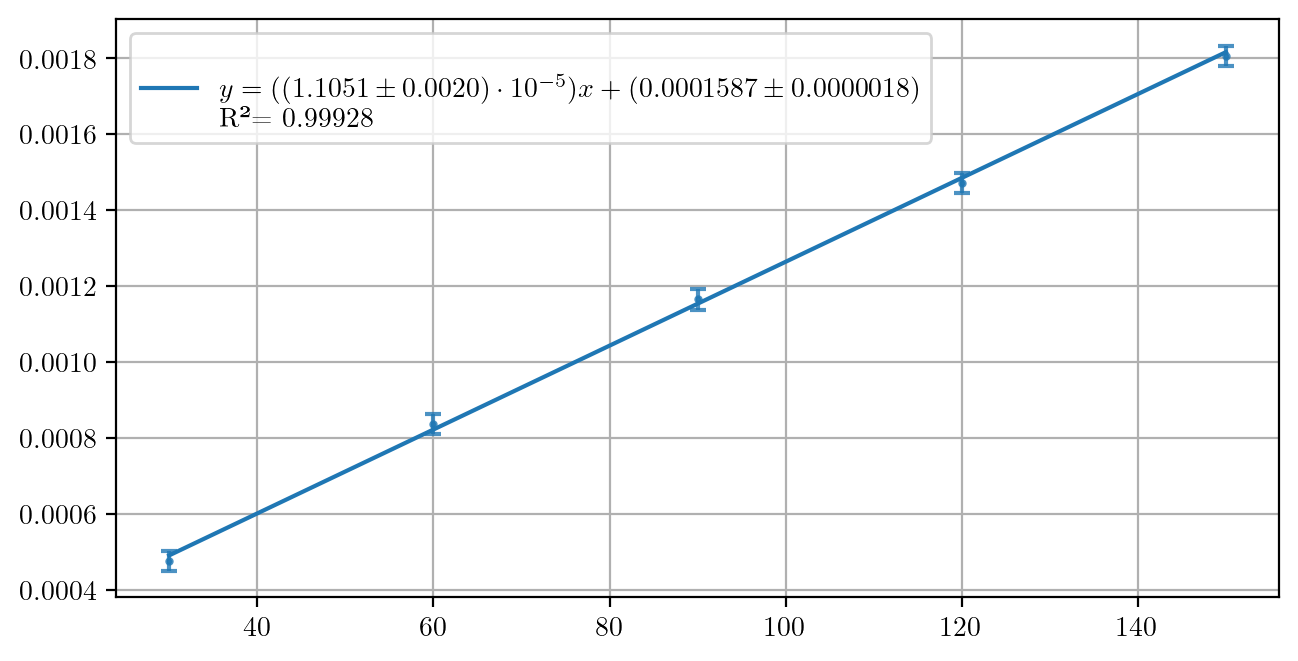

In [6]:
from unc_tools.patches import *

fig, axes = plt.subplots(figsize=(7.5,3.75), dpi=200)

reg = UncRegression(df.time, df.C)

axes.set_xlabel("t, c")
axes.set_ylabel("[Fe(II)]")
reg.plot(ax =axes)

savefig("fe-c-t.png")

I0 = reg.coefs[0]/1.2
Na = 6.022e23
h = 6.63e-34
c = 3e8
lam = 365e-9

I0, I0 * Na * h * c / lam

(8.582606485429554e-07+/-1.6264627028739245e-09,
 0.2816448862786458+/-0.0005337363466041033)

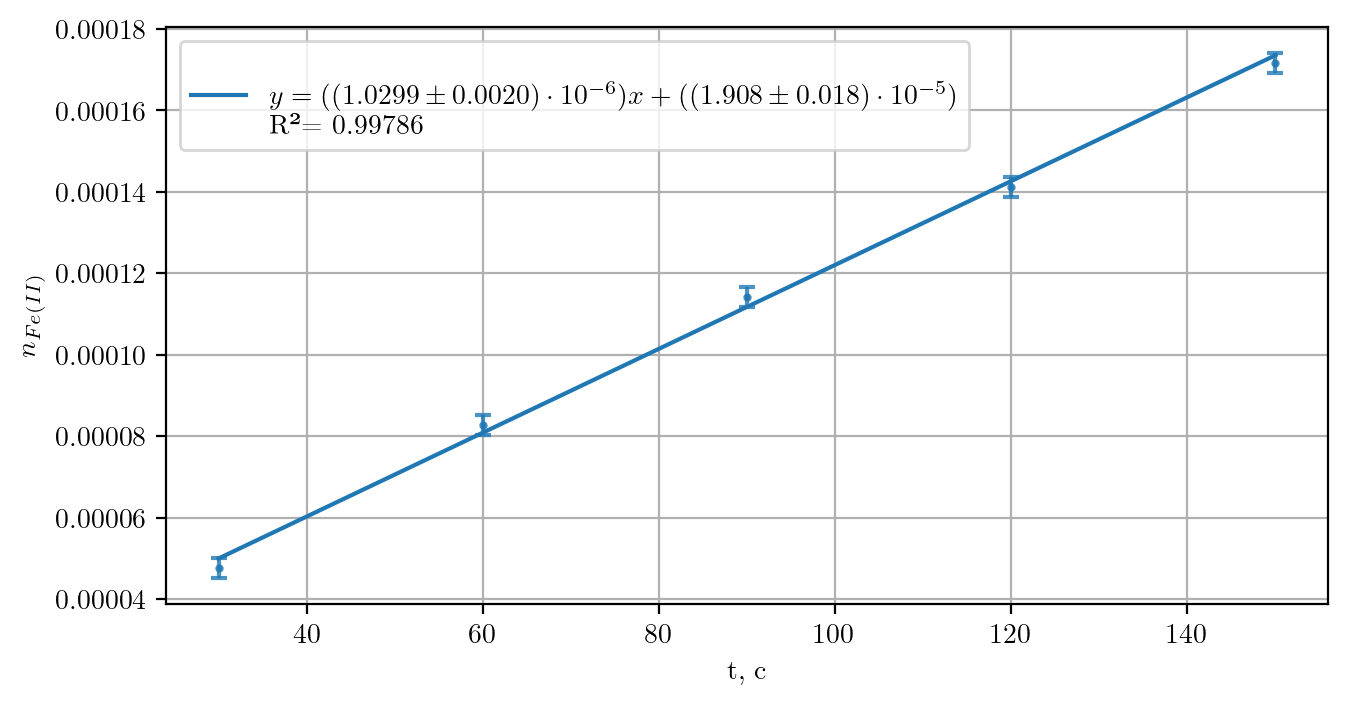

In [4]:
from unc_tools.patches import *

fig, axes = plt.subplots(figsize=(7.5,3.75), dpi=200)

reg = UncRegression(df.time, df.n)


reg.plot(ax =axes)
axes.set_xlabel("t, c")
axes.set_ylabel("$n_{Fe(II)}$")
savefig("fe-n-t")

I0 = reg.coefs[0]/1.2
Na = 6.022e23
h = 6.63e-34
c = 3e10
lam = 365e-9

I0 = reg.coefs[0]/1.2
Na = 6.022e23
h = 6.63e-34
c = 3e8
lam = 365e-9

I0, I0 * Na * h * c / lam